In [43]:
import os
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [44]:
def Merge_CSV(folder_name):
    #path='/Users/wrushabhgonnade/Downloads/AReM/'
    os.chdir('/Users/wrushabhgonnade/Downloads/AReM/'+folder_name)
    dest=os.listdir('/Users/wrushabhgonnade/Downloads/AReM/'+folder_name)
    
    df=pd.read_csv(dest[0],skiprows=4)
    for j in range(1,len(dest)):
        df1=pd.read_csv(dest[j],skiprows=4)
        df=df.append(df1)
        df['label']=folder_name
    return df

In [45]:
bending1_df=Merge_CSV('bending1')
bending2_df=Merge_CSV('bending2')
#cycling_df=Merge_CSV('cycling')
lying_df=Merge_CSV('lying')
sitting_df=Merge_CSV('sitting')
standing_df=Merge_CSV('standing')
walking_df=Merge_CSV('walking')

In [46]:
bending1_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1
...,...,...,...,...,...,...,...,...
475,118750,42.50,0.50,20.00,0.82,36.00,0.00,bending1
476,119000,42.67,0.47,21.00,0.00,36.33,0.47,bending1
477,119250,44.33,0.94,21.00,0.00,36.33,0.47,bending1
478,119500,45.25,0.43,26.75,1.79,36.00,0.00,bending1


In [47]:
bending2_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,34.50,1.50,8.00,1.58,28.00,0.71,bending2
1,250,36.00,0.00,11.25,3.49,28.50,0.50,bending2
2,500,36.00,0.00,20.00,1.22,27.00,0.71,bending2
3,750,38.25,0.43,21.25,0.43,26.00,0.71,bending2
4,1000,37.50,1.12,22.00,0.82,23.67,2.49,bending2
...,...,...,...,...,...,...,...,...
475,118750,33.00,0.00,1.25,0.43,19.00,1.00,bending2
476,119000,33.00,0.00,3.75,0.83,19.00,1.00,bending2
477,119250,33.00,0.00,5.25,1.30,18.50,0.50,bending2
478,119500,32.75,0.43,2.50,0.50,19.25,0.83,bending2


In [48]:
lying_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.50,0.50,4.33,1.25,12.00,0.00,lying
1,250,39.50,0.50,7.00,0.00,12.33,0.47,lying
2,500,39.50,0.50,6.33,2.49,11.75,0.43,lying
3,750,39.67,0.47,8.75,1.30,12.67,0.47,lying
4,1000,39.50,0.50,5.00,0.71,11.75,0.43,lying
...,...,...,...,...,...,...,...,...
475,118750,41.50,0.50,10.67,0.47,14.00,0.82,lying
476,119000,41.50,0.50,10.80,0.40,14.40,0.80,lying
477,119250,41.75,0.43,10.00,0.00,13.67,0.94,lying
478,119500,42.00,0.00,9.40,0.49,14.00,1.10,lying


In [49]:
sitting_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,33.00,0.0,11.75,0.43,14.67,0.47,sitting
1,250,33.75,1.3,13.75,1.09,14.50,1.12,sitting
2,500,36.00,0.0,12.25,0.43,16.50,0.87,sitting
3,750,36.00,0.0,12.00,0.00,15.50,0.50,sitting
4,1000,36.00,0.0,11.75,0.43,15.75,0.83,sitting
...,...,...,...,...,...,...,...,...
475,118750,42.00,0.0,20.50,0.87,18.50,0.50,sitting
476,119000,42.00,0.0,21.25,0.43,17.50,0.50,sitting
477,119250,42.00,0.0,21.00,0.00,16.00,0.82,sitting
478,119500,42.00,0.0,21.00,0.00,18.25,0.43,sitting


In [50]:
standing_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,45.00,0.00,19.00,0.82,10.00,1.22,standing
1,250,45.33,0.47,15.67,0.94,9.75,1.48,standing
2,500,45.25,0.43,16.00,0.71,11.50,0.50,standing
3,750,45.25,0.43,17.75,1.09,10.00,1.00,standing
4,1000,45.50,0.50,20.00,0.71,11.75,0.43,standing
...,...,...,...,...,...,...,...,...
475,118750,44.50,0.50,18.75,0.83,5.25,1.79,standing
476,119000,44.50,0.50,19.33,0.47,6.00,0.82,standing
477,119250,44.50,0.50,19.25,0.83,7.25,1.30,standing
478,119500,44.50,0.50,19.00,0.71,8.00,0.71,standing


In [51]:
walking_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,32.25,3.27,14.50,6.02,13.25,4.02,walking
1,250,37.50,1.12,16.75,4.60,17.25,4.32,walking
2,500,34.00,7.45,18.00,0.00,16.00,2.55,walking
3,750,28.75,4.02,14.50,1.50,15.00,2.55,walking
4,1000,37.50,5.41,15.25,4.44,14.67,1.25,walking
...,...,...,...,...,...,...,...,...
475,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
477,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
478,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [52]:
final_df=pd.concat([bending1_df,bending2_df,lying_df,sitting_df,standing_df,walking_df])

In [53]:
final_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1
...,...,...,...,...,...,...,...,...
475,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
477,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
478,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [13]:
PR=ProfileReport(final_df)
PR.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
final_df.isnull().sum()

# Columns: time      0
avg_rss12          480
var_rss12          480
avg_rss13          480
var_rss13          480
avg_rss23          480
var_rss23          480
label                0
dtype: int64

In [55]:
final_df.avg_rss12.fillna(final_df['avg_rss12'].mean(),inplace=True)

In [56]:
final_df.var_rss12.fillna(final_df['var_rss12'].mean(),inplace=True)
final_df.var_rss13.fillna(final_df['var_rss13'].mean(),inplace=True)
final_df.avg_rss13.fillna(final_df['avg_rss13'].mean(),inplace=True)
final_df.var_rss23.fillna(final_df['var_rss23'].mean(),inplace=True)

In [57]:
final_df.isnull().sum()

# Columns: time      0
avg_rss12            0
var_rss12            0
avg_rss13            0
var_rss13            0
avg_rss23          480
var_rss23            0
label                0
dtype: int64

In [58]:
final_df.avg_rss23.fillna(final_df['avg_rss23'].mean(),inplace=True)

In [59]:
final_df.isnull().sum()

# Columns: time    0
avg_rss12          0
var_rss12          0
avg_rss13          0
var_rss13          0
avg_rss23          0
var_rss23          0
label              0
dtype: int64

In [23]:
PR=ProfileReport(final_df)
PR.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

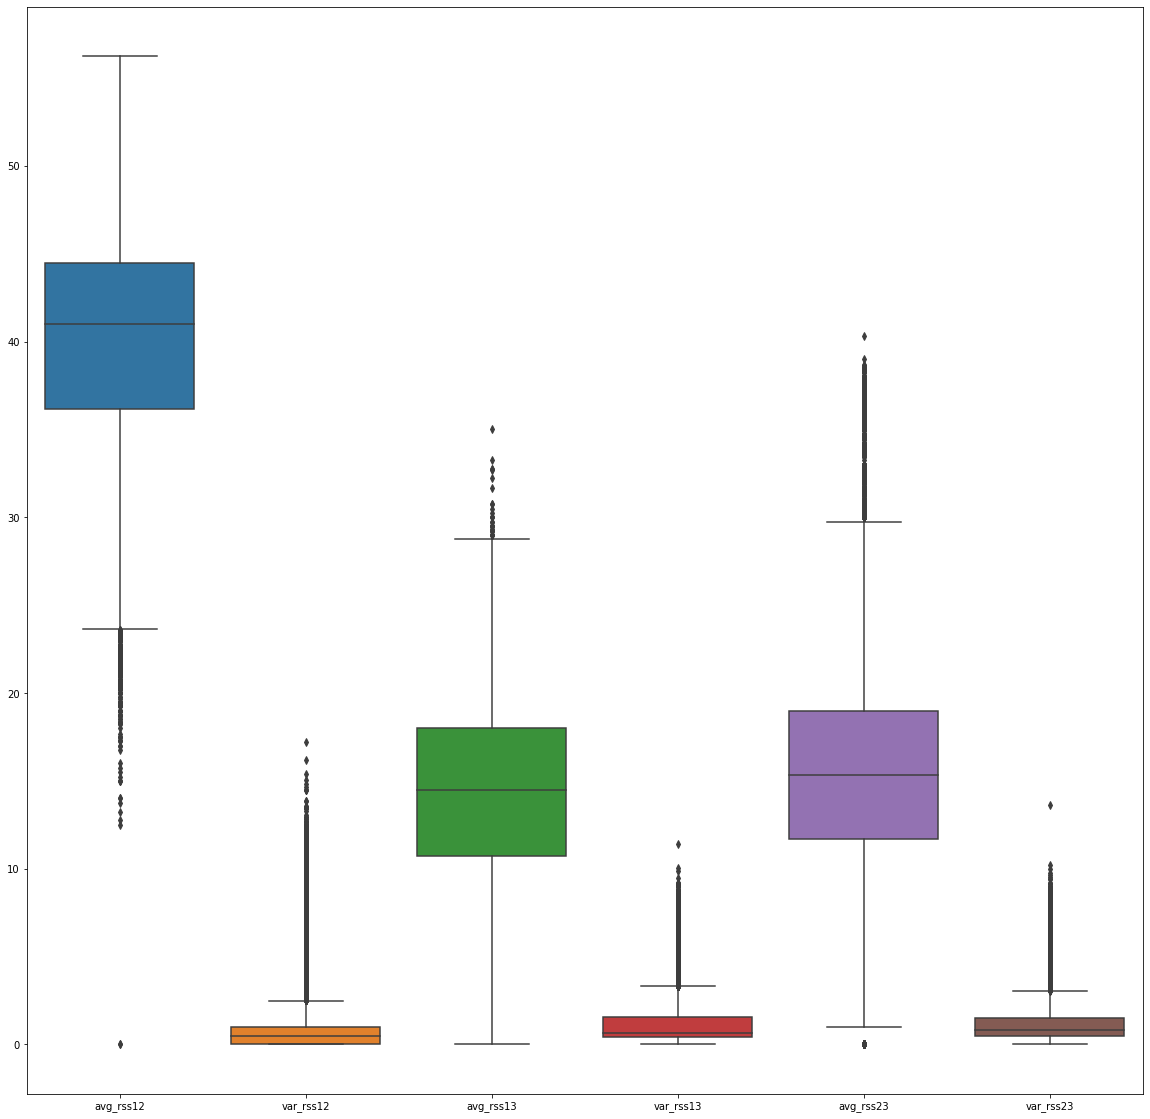

In [60]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=final_df, ax=ax)

In [61]:
q=final_df['var_rss12'].quantile(0.98)
final_df_new=final_df[final_df['var_rss12']<q]

<AxesSubplot:>

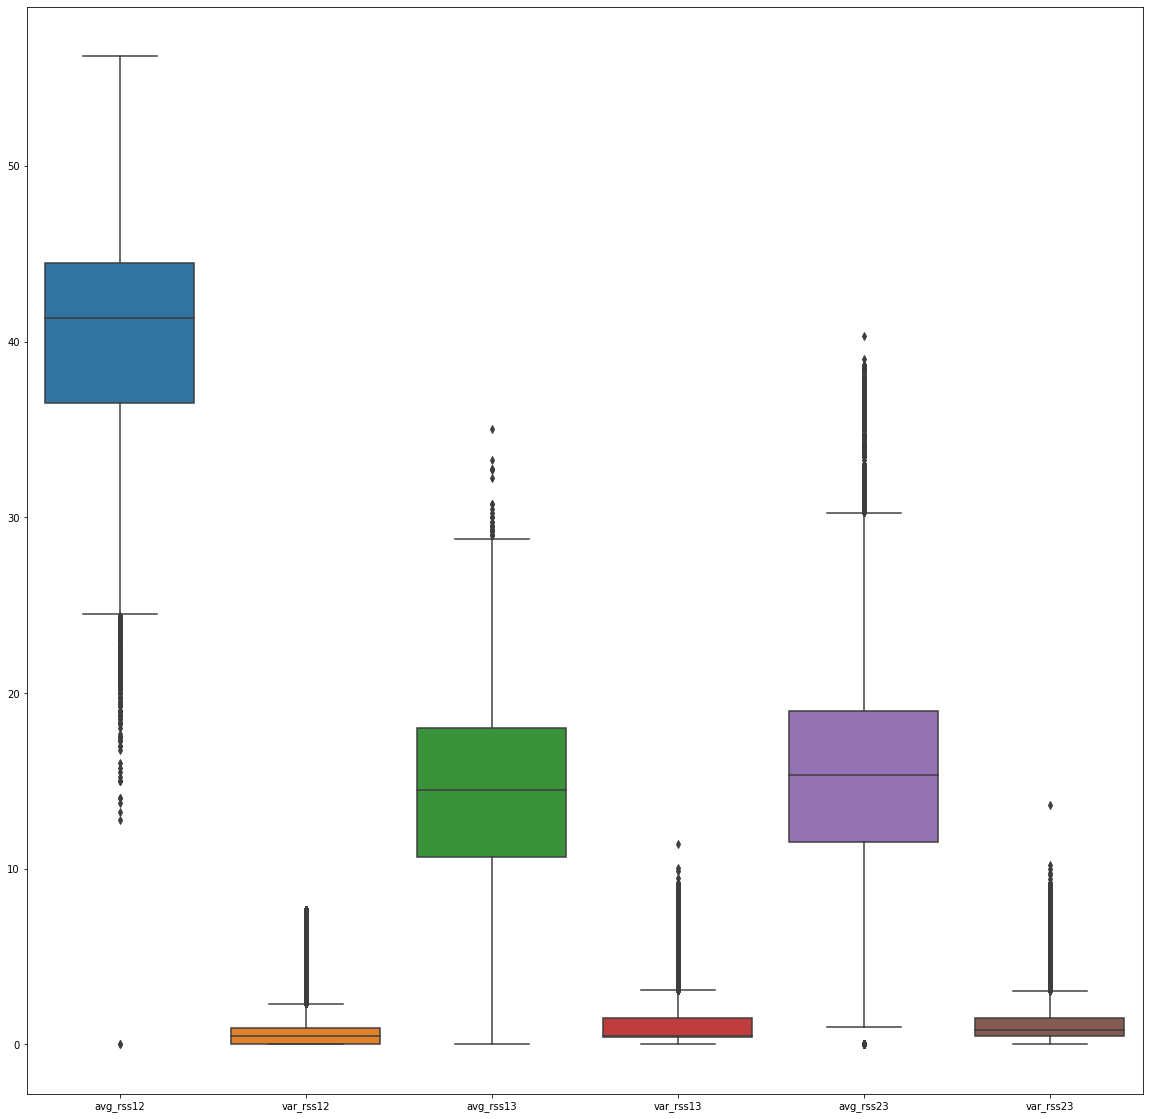

In [62]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=final_df_new, ax=ax)

In [63]:
q=final_df_new['avg_rss12'].quantile(0.97)
final_df_new=final_df_new[final_df_new['avg_rss12']<q]

<AxesSubplot:>

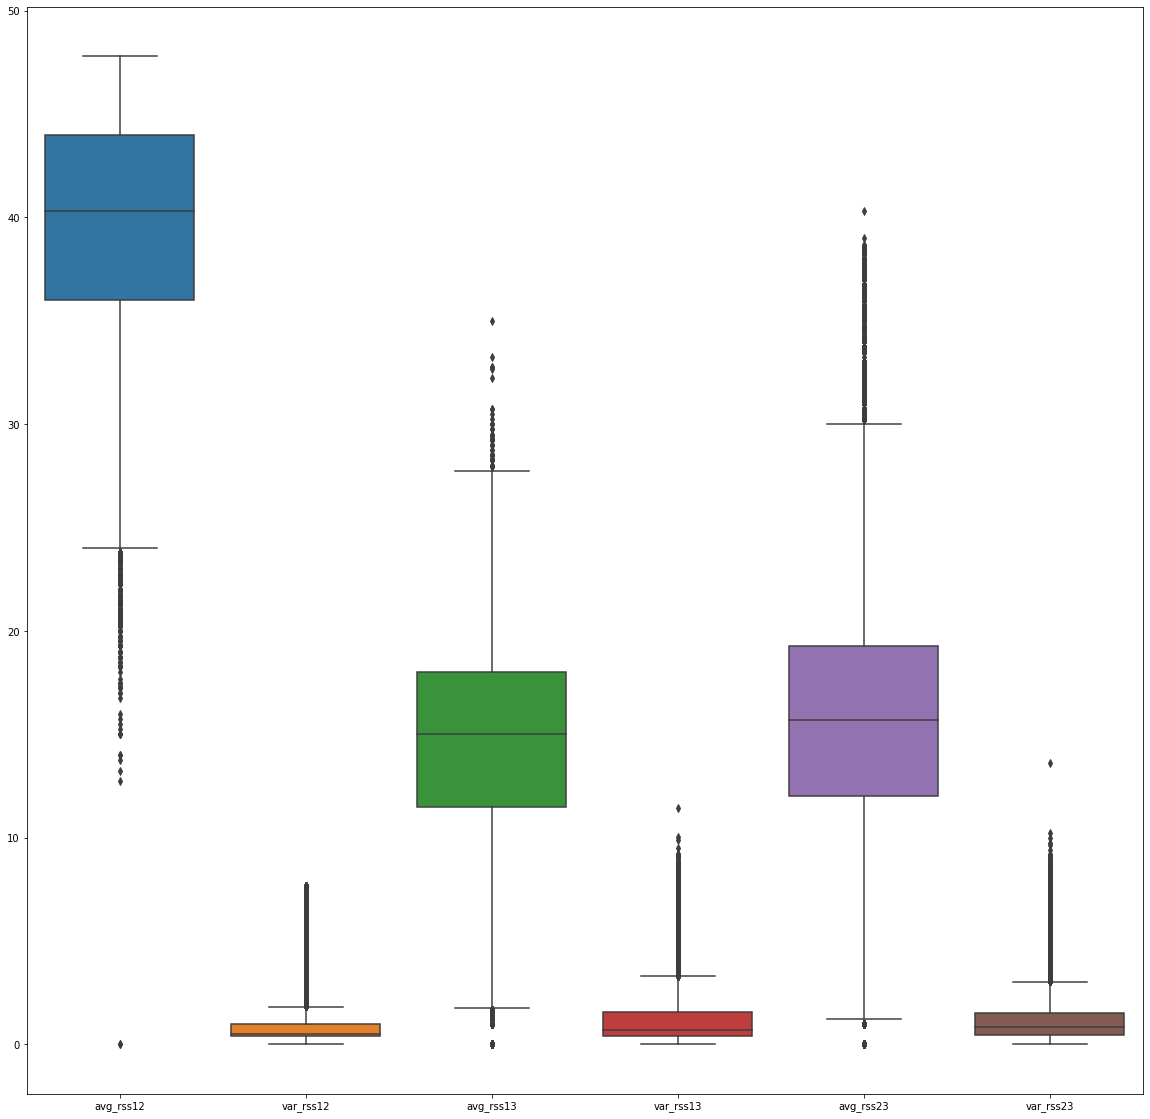

In [64]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=final_df_new, ax=ax)

In [65]:
q=final_df_new['avg_rss23'].quantile(0.98)
final_df_new=final_df_new[final_df_new['avg_rss23']<q]

q=final_df_new['avg_rss13'].quantile(0.98)
final_df_new=final_df_new[final_df_new['avg_rss13']<q]

q=final_df_new['var_rss13'].quantile(0.98)
final_df_new=final_df_new[final_df_new['var_rss13']<q]

q=final_df_new['var_rss23'].quantile(0.98)
final_df_new=final_df_new[final_df_new['var_rss23']<q]

<AxesSubplot:>

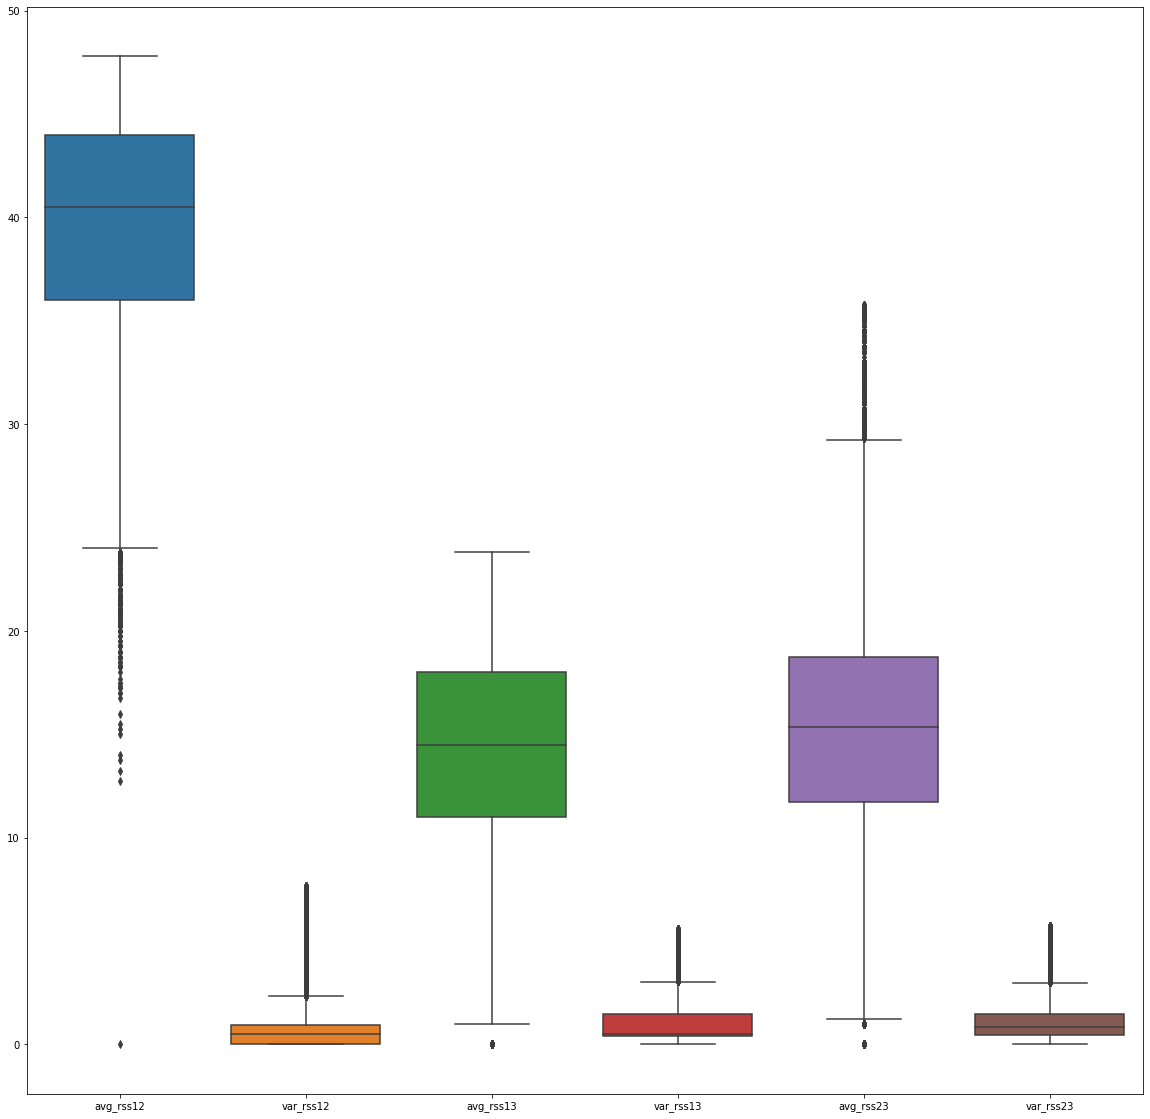

In [66]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=final_df_new, ax=ax)

In [67]:
final_df_new

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1
...,...,...,...,...,...,...,...,...
474,118500,37.25,7.26,14.00,1.58,13.25,4.92,walking
475,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
478,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [68]:
final_df=final_df_new
final_df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1
...,...,...,...,...,...,...,...,...
474,118500,37.25,7.26,14.00,1.58,13.25,4.92,walking
475,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
478,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [69]:
final_df.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1


In [70]:
X=final_df.iloc[:,:-1]

In [71]:
final_df.drop('# Columns: time', axis=1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29350 entries, 0 to 479
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   # Columns: time  29350 non-null  object 
 1   avg_rss12        29350 non-null  float64
 2   var_rss12        29350 non-null  float64
 3   avg_rss13        29350 non-null  float64
 4   var_rss13        29350 non-null  float64
 5   avg_rss23        29350 non-null  float64
 6   var_rss23        29350 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


In [72]:
X

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.00,18.50,0.50,12.00,0.00
1,250,42.00,0.00,18.00,0.00,11.33,0.94
2,500,42.75,0.43,16.75,1.79,18.25,0.43
3,750,42.50,0.50,16.75,0.83,19.00,1.22
4,1000,43.00,0.82,16.25,0.83,18.00,0.00
...,...,...,...,...,...,...,...
474,118500,37.25,7.26,14.00,1.58,13.25,4.92
475,118750,31.50,1.66,12.50,3.20,14.25,4.44
476,119000,27.33,1.25,11.33,0.94,20.00,4.00
478,119500,33.75,1.30,15.75,5.21,16.50,2.69


In [73]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29350 entries, 0 to 479
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   # Columns: time  29350 non-null  object 
 1   avg_rss12        29350 non-null  float64
 2   var_rss12        29350 non-null  float64
 3   avg_rss13        29350 non-null  float64
 4   var_rss13        29350 non-null  float64
 5   avg_rss23        29350 non-null  float64
 6   var_rss23        29350 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


In [74]:
y=final_df.iloc[:,-1]
y

0      bending1
1      bending1
2      bending1
3      bending1
4      bending1
         ...   
474     walking
475     walking
476     walking
478     walking
479     walking
Name: label, Length: 29350, dtype: object

In [75]:
scaler=StandardScaler()

In [76]:
X_scaled=scaler.fit_transform(X)

ValueError: could not convert string to float: '0 32.50 0.50 0.00 0.00 19.00 1.00 '

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.20, random_state=200)

NameError: name 'X_scaled' is not defined

In [78]:
X_train

NameError: name 'X_train' is not defined

In [79]:
regressor=LogisticRegression()

In [210]:
log_regressor=regressor.fit(X_train,y_train)

In [211]:
log_regressor.predict(X_test)

array(['sitting', 'lying', 'sitting', ..., 'walking', 'bending1',
       'standing'], dtype=object)

In [212]:
log_regressor.score(X_test,y_test)

0.7045996592844974

In [213]:
log_lib=LogisticRegression(verbose=1, solver='liblinear')
log_lib_regr=log_lib.fit(X_train,y_train)

[LibLinear]

In [214]:
log_lib_regr.score(X_test,y_test)

0.6984667802385008

In [215]:
log_saga=LogisticRegression(verbose=1, solver='saga')
log_saga_regr=log_saga.fit(X_train,y_train)
log_saga_regr.score(X_test,y_test)

convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


0.7045996592844974

In [216]:
log_lbfgs=LogisticRegression(verbose=1, solver='lbfgs')
log_lbfgs_regr=log_lbfgs.fit(X_train,y_train)
log_lbfgs_regr.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


0.7045996592844974

In [217]:
log_new=LogisticRegression(verbose=1, solver='newton-cg')
log_new_regr=log_new.fit(X_train,y_train)
log_new_regr.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


0.7045996592844974

In [223]:
y_pred_saga=log_saga.predict(X_test)

In [224]:
accuracy_score(y_test,y_pred_saga)

0.7045996592844974

In [1]:
Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got liear.

SyntaxError: invalid syntax (<ipython-input-1-c7e9396219a8>, line 1)

In [ ]:
# Using GridSearchCv
